# Continuous-time univariate deterministic model: population growth models

## [Models in Population Biology](http://modelspopbiol.yoavram.com)
## Yoav Ram

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('talk')

# Exponential growth model

How do we model the growth of a population?

According to [Malthus](http://en.wikipedia.org/wiki/Thomas_Robert_Malthus), if the instantaneous rate of births is $b$ and the instantaneous rate of deaths is $r$, then the instantaneous rate of growth (or decline) of the population is

$$
\frac{dN(t)}{dt} = b N(t) - d N(t) = r N(t)
$$

where $N(t)$ is the population size at time $t$ and $r=b-d$ is the specific growth rate (or per capita growth rate).

This is called the Malthusian growth model or more commonly the [exponential growth model](https://en.wikipedia.org/wiki/Exponential_growth).

This ordinary differential equation, or ODE, can be solved via [logarithmic differentiation](https://en.wikipedia.org/wiki/Logarithmic_differentiation):

$$
\frac{dN(t)}{dt} = r N(t) \Rightarrow \\
\frac{1}{N(t)} \frac{dN(t)}{dt} = r \Rightarrow \\
\frac{d \log{N(t)}}{dt} = r \Rightarrow \\
\log{N(t)} =  r t + C \Rightarrow \\
N(t) = e^{rt + C} = e^{rt} e^{C}
$$

Now add the boundary condition $N(0) = N_0$ to get

$$
e^{C} = N_0
$$

and finally

$$
N(t) = N_0 e^{rt}
$$

Note that during the integration we found that the **logarithm of the population should be a linear function of time** $\log{N(t)} = \log{N(0)} + rt$.

Let's implement this model.
Say we have a bacterial population with initial density $N_0=100$ cells and a specific growth rate of $r=1$ for one cell division per hour (i.e., 60 minutes between cell divisions), and let them grow for 24 hours.

In [25]:
N0 = 100
r = 1
t = np.linspace(0, 24, 500)
N = N0 * np.exp(r * t)

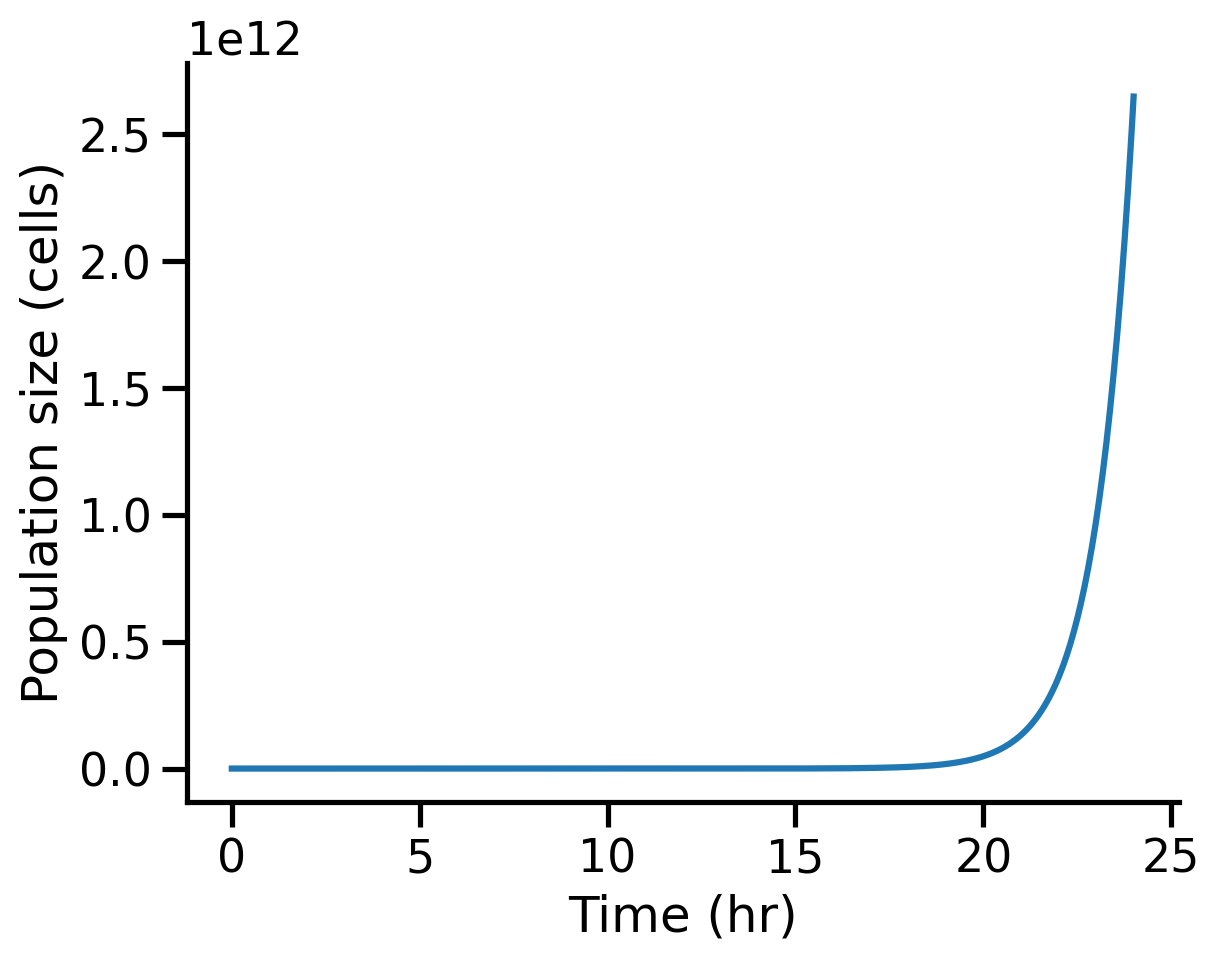

In [26]:
plt.plot(t, N)
plt.xlabel('Time (hr)')
plt.ylabel('Population size (cells)')
sns.despine();

This is a problem - the number of cells after one day is $\approx 2.5\cdot10^{12}$, which is just... too much. 

What can limit the growth of the population?

# Logistic growth model

The Malthusian/exponential growth model can't always be correct: many times growth decelerates and effectively stops when reaching a certain size $K$ (carrying capacity, maximum yield, maximum population density etc.). 
This is true for fish body size (Schnute 1981), microbial population size in a constant volume (Zwietering 1990), and natural animal populations. 
In these cases it is common to use the [**logistic growth model**](http://en.wikipedia.org/wiki/Logistic_function#In_ecology:_modeling_population_growth) in which the size of the population inhibits growth, leading to a maximum population size after which growth stops.

For example, consider a population $N(t)$ which consumes a resource $R(t)$ to grow.

$$
\frac{dR(t)}{dt} = -h R(t) N(t) \\
\frac{dN(t)}{dt} = \epsilon h R(t) N(t) \\
$$

From now on we will omit the $(t)$ after $N$ and $R$, for convenience.

Set $K = \epsilon R + N$ so that:
- $\frac{dK}{dt} = \epsilon \frac{dR}{dt} + \frac{dN}{dt} = 0$ and therefore $K$ is constant and we can set $K=\epsilon R(0)+N(0)$.
- $\epsilon R = K - N$.

This makes sense - the population consumes a resource to grow, therefore the resource is depleted, which eventually leads to the population growth seizing. It is a law of conservation ($K$ is constant).

So, we have

$$
\frac{dN}{dt} = \epsilon h R N  = \\ 
\epsilon h N (K-N) \Rightarrow \\ 
\frac{dN}{dt} = r N \left(1-\frac{N}{K}\right)
$$
where $r = h / K$.

This is called the logistic ordinary differential equation.

We can solve this equation by a similar approach to the exponential model, using integration.

$$
N(t) = \frac{K}{1 - \left( 1 - \frac{K}{N(0)} \right) e^{-r t} }
$$

In [12]:
def logistic(t, N0, r, K):
    return K / (1 - (1 - K/N0) * np.exp(-r * t))

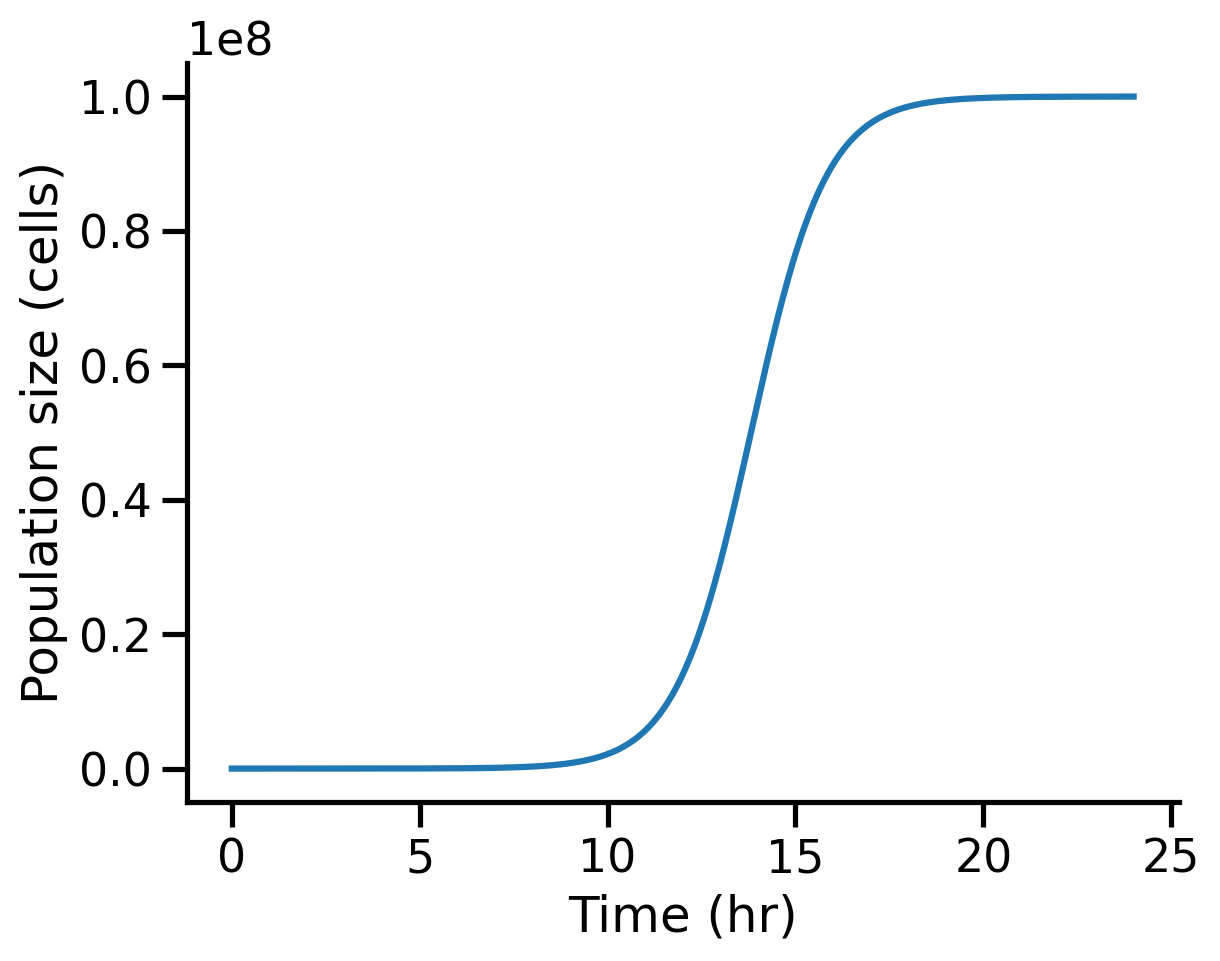

In [27]:
N0 = 100
r = 1
K = 1e8
t = np.linspace(0, 24, 500)
N = logistic(t, N0, r, K)

plt.plot(t, N)
plt.xlabel('Time (hr)')
plt.ylabel('Population size (cells)')
sns.despine();

We can examine how different parameter values interact:

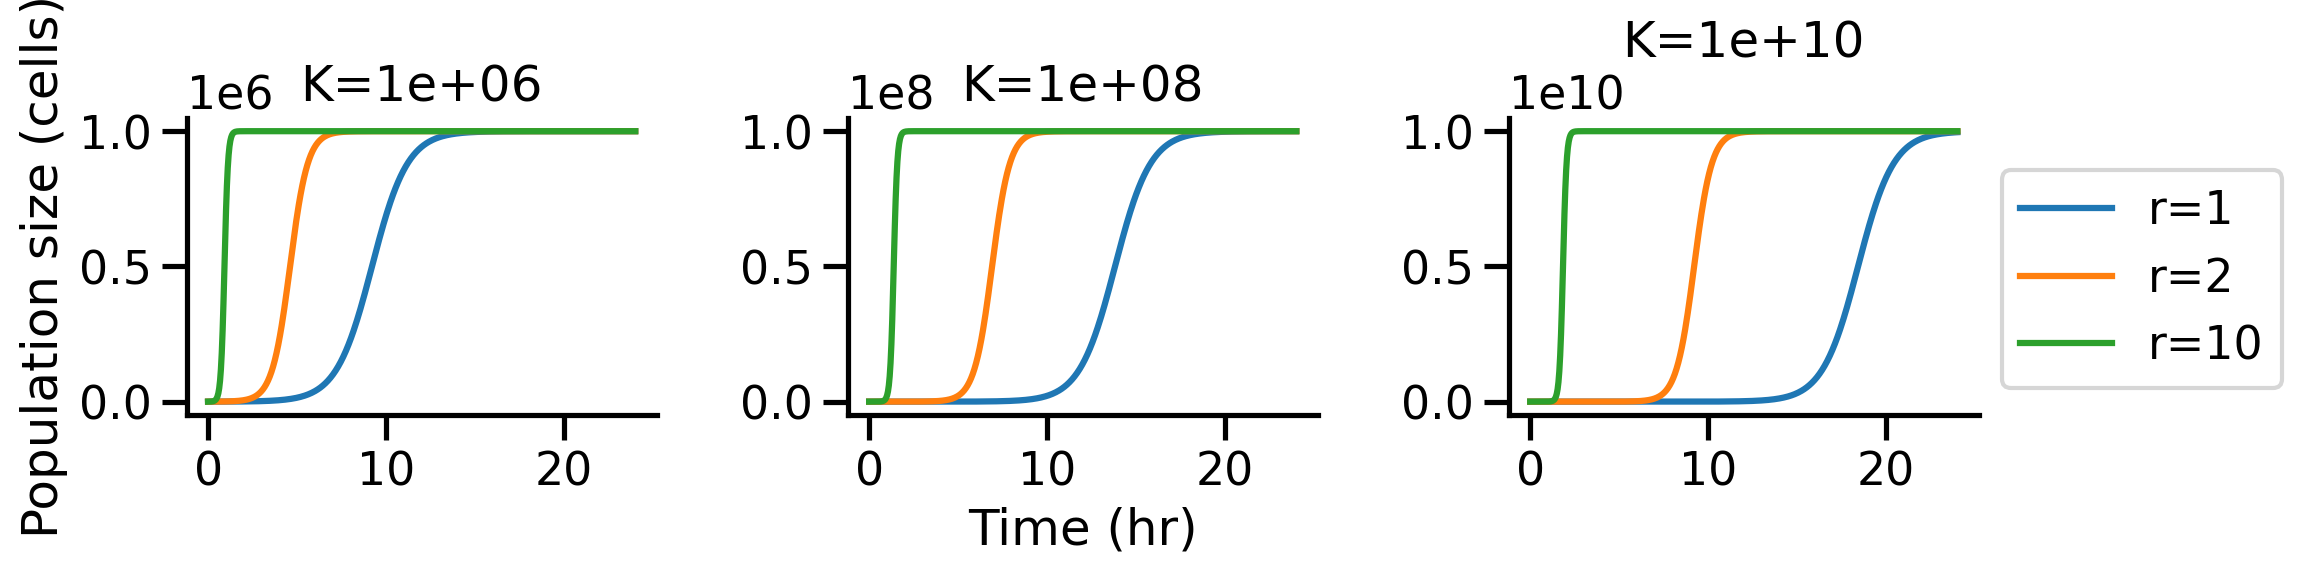

In [46]:
N0 = 100
t = np.linspace(0, 24, 500)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for r in [1, 2, 10]:
    for j, K in enumerate([1e6, 1e8, 1e10]):
        N = logistic(t, N0, r, K)
        axes[j].plot(t, N, label='r={}'.format(r))
        axes[j].set_title("K={:.0e}".format(K))
axes[1].set_xlabel('Time (hr)')
axes[0].set_ylabel('Population size (cells)')
axes[2].legend(bbox_to_anchor=(1, 0.9))
fig.tight_layout()
sns.despine();

Let's look again at the logistic ODE:
$$
\frac{dN}{dt} = r N \left(1-\frac{N}{K}\right) = rN - r \frac{N^2}{K}
$$

You can see that $dN/dt$ will reach its minimum zero when $N=0$ and when $N=K$.
To find its maximum, let's take a derivative with respect to $N$ and solve for zero:
$$
\frac{d^2N}{dtdN} = r - 2r\frac{N}{K} = 0 \Rightarrow N = \frac{K}{2}
$$
So the maximum of the derivative $dN/dt$ will be reached exactly when $N=K/2$; at this point, growth will stop accelerating and begin to deccelerate until it halts at $N=K$.
The maximum derivative will be $r K/4$ (just substitue $N=K/2$).

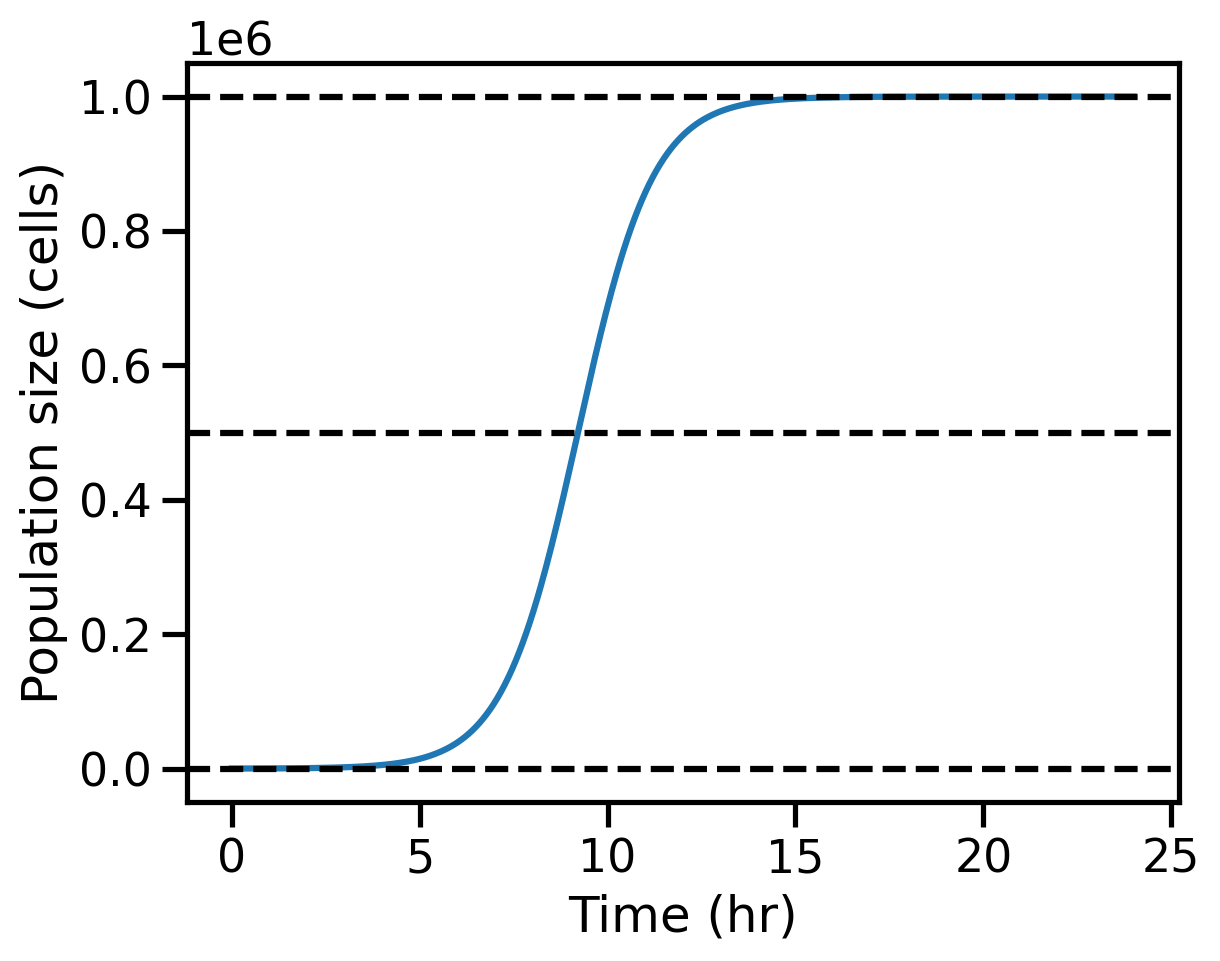

In [59]:
r = 1
K = 1e6
N = logistic(t, N0, r, K)

plt.plot(t, N)
plt.axhline(N0, color='k', ls='--')
plt.axhline(K/2, color='k', ls='--')
plt.axhline(K, color='k', ls='--')

plt.xlabel('Time (hr)')
plt.ylabel('Population size (cells)');

When will $N$ reach $K/2$?
We can check this in the solution to the ODE:
$$
N(t) = \frac{K}{1 - \left( 1 - \frac{K}{N(0)} \right) e^{-r t} } = K/2 \Rightarrow \\
\frac{1}{1 - \left( 1 - \frac{K}{N(0)} \right) e^{-r t} } = 1/2 \Rightarrow \\
1 - \left( 1 - \frac{K}{N(0)} \right) e^{-r t}  = 2 \Rightarrow \\
\left( 1 - \frac{K}{N(0)} \right) e^{-r t}  = -1 \Rightarrow \\
1 - \frac{K}{N(0)}   = -e^{r t} \Rightarrow \\
\frac{K-N(0)}{N(0)}  = e^{r t} \Rightarrow \\
\log{\frac{K-N(0)}{N(0)}}  = r t \Rightarrow \\
\frac{\log{\left(K-N(0)\right)} - \log{\left(N(0)\right)}}{r}  = t
$$

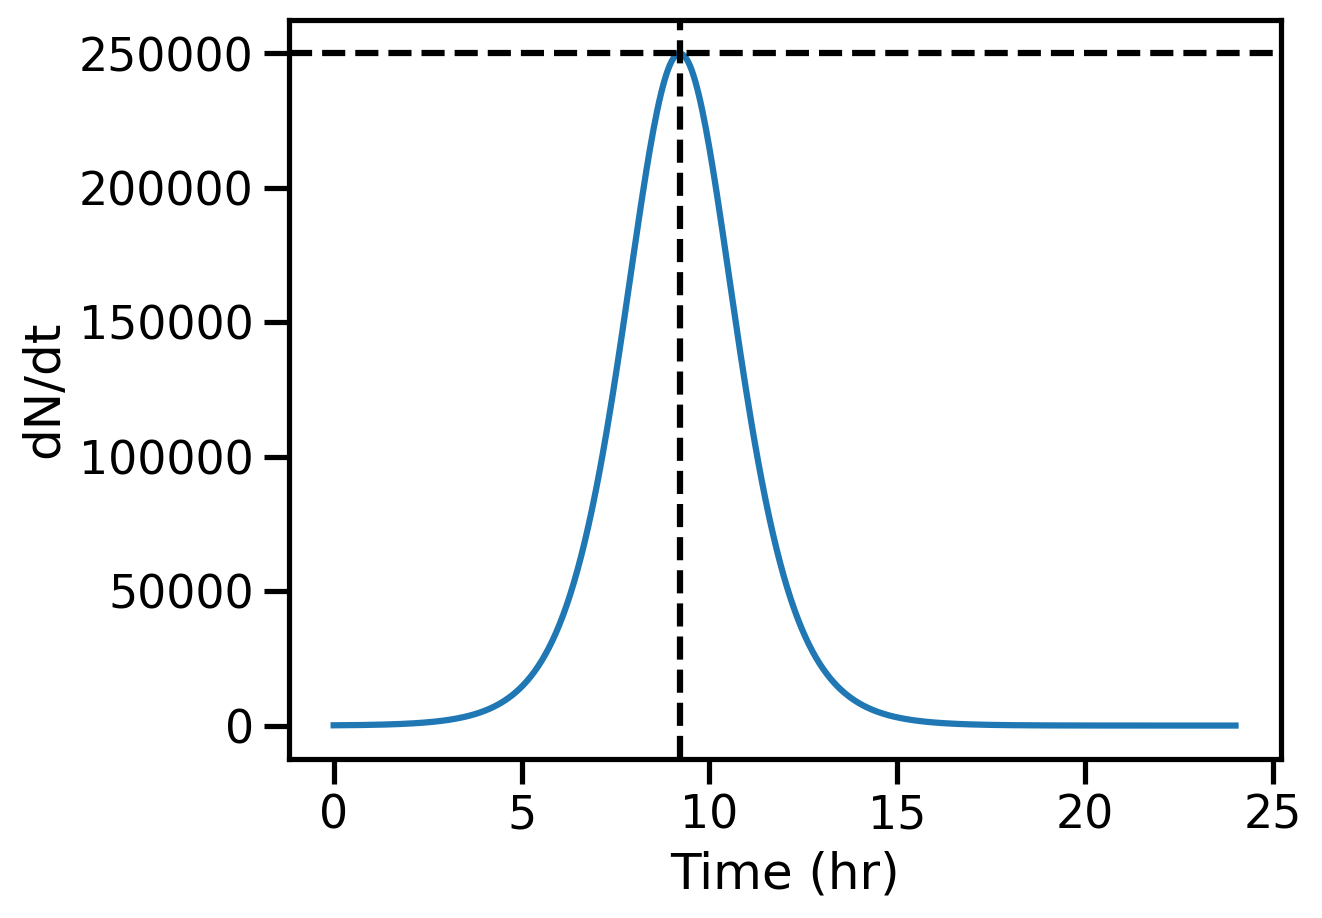

In [58]:
plt.plot(t, r*N*(1-N/K))
plt.axvline((np.log(K-N0) - np.log(N0))/r, color='k', ls='--')
plt.axhline(r*K/4, color='k', ls='--')
plt.xlabel('Time (hr)')
plt.ylabel('dN/dt');

That seems a bit too nice--why should the maximum of the population growth rate $dN/dt$ be reached exactly half way to the maximum yeild, $K$?

# Generalized logistic model

The [generalized logistic model](https://en.wikipedia.org/wiki/Generalised_logistic_function) (also called the [Richards model](https://doi.org/10.1093/jxb/10.2.290) has an additional parameter $\nu$ so that the curve doesn't have to be symmetric, that is, the time to get to $K/2$ can be longer/shorter than the time to get from $K/2$ to $K$.

$$
\frac{d N}{d t}= r N \left(1 - \left(\frac{N}{K}\right)^{\nu}\right)
$$
The other parameters are the same as the logistic model.

This model can also be solved:
$$
N(t) = \frac{K}{\left(1 - \left( 1 - \left(\frac{K}{N(0)}\right)^{\nu} \right) e^{-r \nu t} \right)^{1/\nu}}
$$


In [60]:
def generalized_logistic(t, N0, r, K, ν):
    return K / (1 - (1 - (K/N0)**ν) * np.exp(-r * ν * t))**(1/ν)

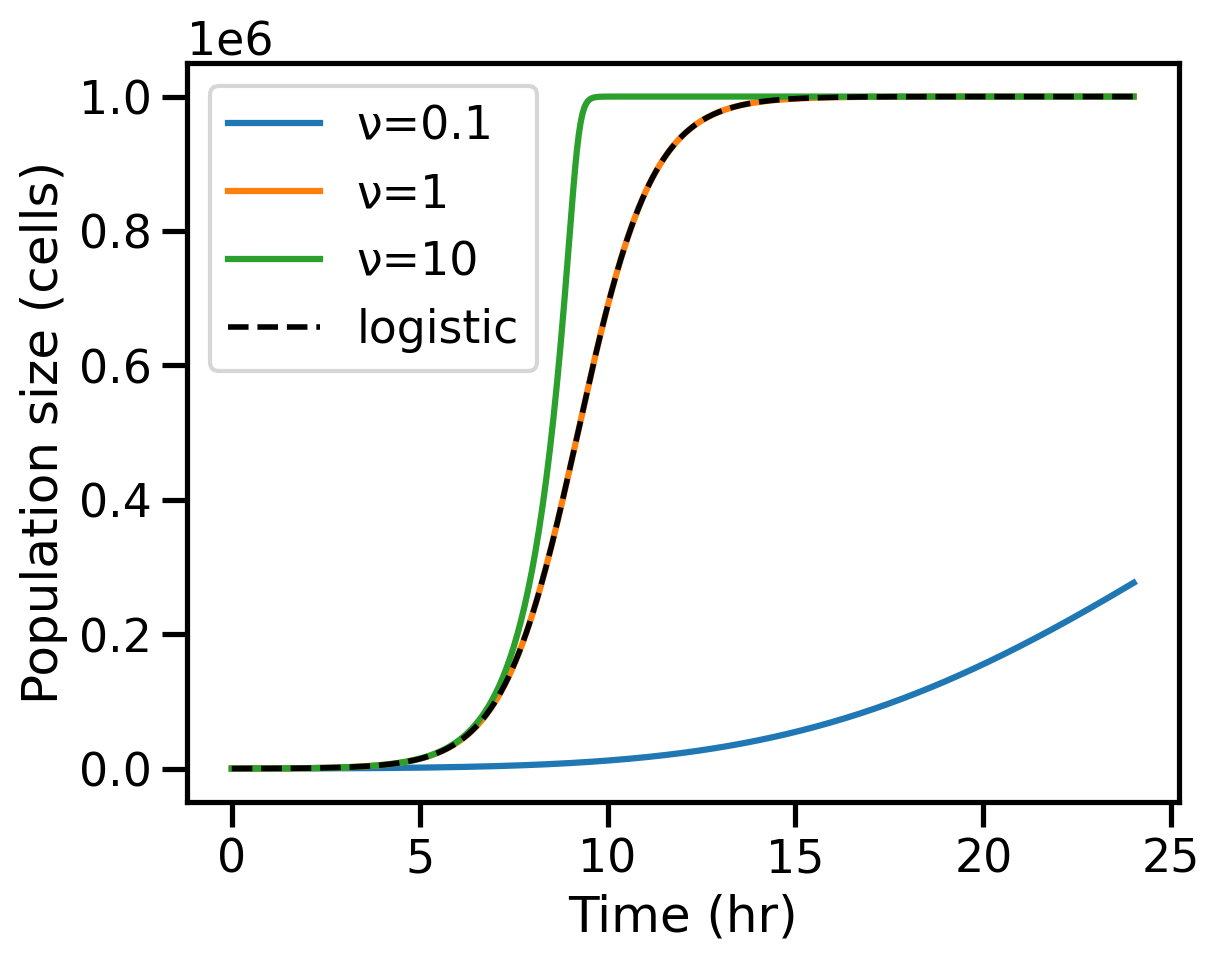

In [69]:
r = 1
K = 1e6

for ν in [0.1, 1, 10]:
    N = generalized_logistic(t, N0, r, K, ν)
    plt.plot(t, N, ls='-', label='ν={}'.format(ν))

N = logistic(t, N0, r, K)
plt.plot(t, N, lw=2, ls='--', color='k', label='logistic')

plt.legend()
plt.xlabel('Time (hr)')
plt.ylabel('Population size (cells)');

# References

- [Blog post](https://paulromer.net/economic-growth/) by Paul Romer on population and GDP growth
- Appendices of [Ram et al 2019](https://doi.org/10.1073/pnas.1902217116) shows how to derive and solve the logistic and generalized logistic.

# Colophon
This notebook was written by [Yoav Ram](http://www.yoavram.com) and is part of the [Models in Population Biology](http://modelspopbiol.yoavram.com) course at Tel Aviv University.

This work is licensed under a CC BY-NC-SA 4.0 International License.